In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Función escalón
def step_function(summation):
    return np.sign(summation)

# Predecir la salida de la neurona
def predict(input_data, weights, bias):
    summation = np.dot(input_data, weights) + bias
    return step_function(summation)

# Leer datos desde un archivo CSV
def read_data(file_path):
    data = np.genfromtxt(file_path, delimiter=',')
    inputs = data[:, :-1]
    outputs = data[:, -1]
    return inputs, outputs

# Entrenamiento del perceptrón
def train_perceptron(inputs, outputs, learning_rate, max_epochs, convergence_criterion):
    num_inputs = inputs.shape[1]
    num_patterns = inputs.shape[0]

    # Inicialización de pesos y sesgo de manera aleatoria
    weights = np.random.rand(num_inputs)
    bias = np.random.rand()
    epochs = 0

    while epochs < max_epochs:
        has_converged = True
        for i in range(num_patterns):
            input_pattern = inputs[i]
            target_output = outputs[i]
            predicted_output = np.dot(weights, input_pattern) + bias
            error = target_output - predicted_output

            # Actualización de pesos y sesgo si el error es mayor que el criterio de convergencia
            if abs(error) > convergence_criterion:
                has_converged = False
                weights += learning_rate * error * input_pattern
                bias += learning_rate * error
        # Si converge, se sale del bucle
        if has_converged:
            break
        epochs += 1
    return weights, bias

# Función para probar el perceptrón con nuevos datos
def test_perceptron(inputs, weights, bias):
    predicted_output = np.dot(inputs, weights) + bias
    return np.vectorize(step_function)(predicted_output)

# Graficar
def _plot(features, labels, weights, bias, logic_type, colors=('pink', 'gray')):
    plt.figure(figsize=(8, 6))

    # Separar los puntos por clase
    class_1n_indices = labels == -1
    class_1_indices = labels == 1

    # Dibujar puntos
    plt.scatter(features[class_1n_indices, 0], features[class_1n_indices, 1], c=colors[0], label='Class -1', s=100)
    plt.scatter(features[class_1_indices, 0], features[class_1_indices, 1], c=colors[1], label='Class 1', s=100)

    # Crear una malla para la visualización de la frontera de decisión
    x_min, x_max = features[:, 0].min() - 1, features[:, 0].max() + 1
    y_min, y_max = features[:, 1].min() - 1, features[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    # Obtener predicciones para cada punto en la malla
    predictions = test_perceptron(np.c_[xx.ravel(), yy.ravel()], weights, bias)
    predictions = predictions.reshape(xx.shape)

    # Dibujar la frontera de decisión
    plt.contour(xx, yy, predictions, colors='k', linestyles=['-'], levels=[0])

    # Configuración del título de la gráfica según el tipo de operación lógica
    plt.title(f'Representación gráfica - {logic_type}')

    # Configuración de la visualización
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    plt.show()

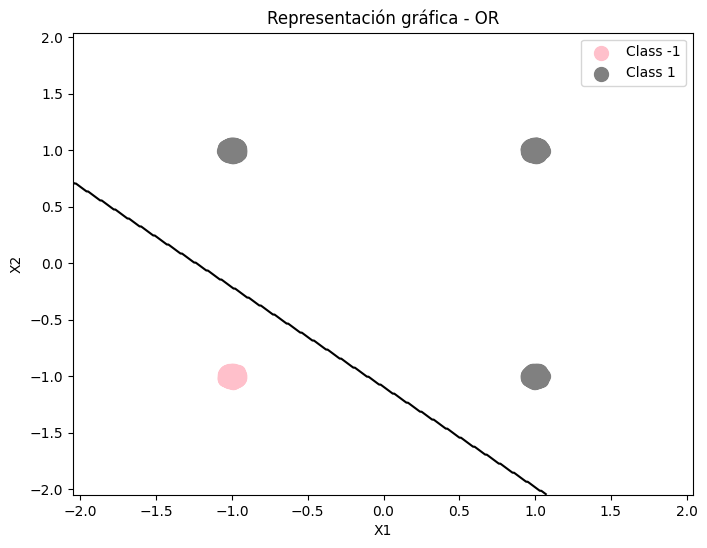

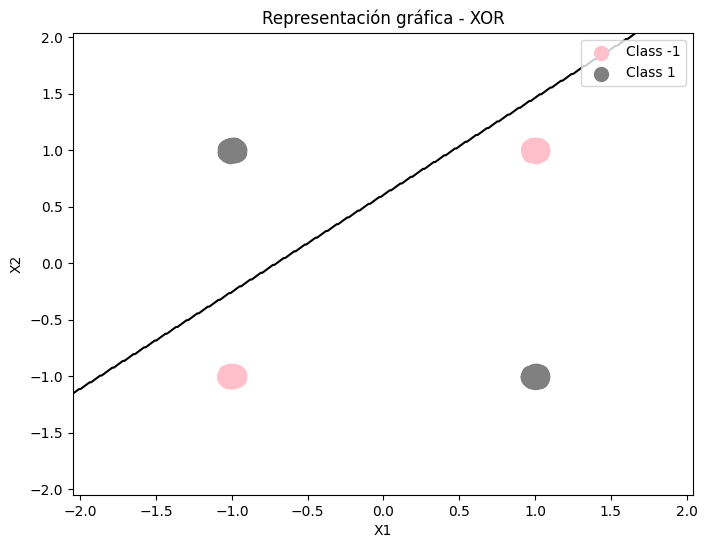

In [ ]:
def main(data_type):
    # Definir rutas de los archivos
    if data_type == "OR":
        training_file = '/content/OR_trn.csv'
        test_file = '/content/OR_tst.csv'
    elif data_type == "XOR":
        training_file = '/content/XOR_trn.csv'
        test_file = '/content/XOR_tst.csv'
    else:
        raise

    # Leer datos de entrenamiento y prueba
    inputs_train, outputs_train = read_data(training_file)
    inputs_test, outputs_test = read_data(test_file)

    # Parámetros de entrenamiento
    max_epochs = 30
    learning_rate = 0.1
    convergence_criterion = 0.01

    # Entrenar el perceptrón
    trained_weights, trained_bias = train_perceptron(inputs_train, outputs_train, learning_rate, max_epochs, convergence_criterion)

    # Probar el perceptrón
    predicted_outputs = test_perceptron(inputs_test, trained_weights, trained_bias)

    # Representación gráfica
    _plot(inputs_train, outputs_train, trained_weights, trained_bias, data_type)

if __name__ == "__main__":
    # Llama al main con ambos OR y XOR
    main("OR")
    print('\n\n')
    main("XOR")